In [75]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [76]:
# Étape 1 : Télécharger les données depuis une URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

# Récupérer les données de l'URL
response = requests.get(file_path)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Écrire les données dans un fichier CSV
    with open("laptop_pricing_dataset.csv", "wb") as file:
        file.write(response.content)
else:
    print(f"Erreur lors de la récupération des données : {response.status_code}")

In [ ]:

# Étape 2 : Charger les données dans un DataFrame
df = pd.read_csv("laptop_pricing_dataset.csv")

# Afficher les premières lignes du DataFrame
df.head()


   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0          35.560            1.6       8             256       1.60    978  
1          39.624            2.0       4             256       2.20    634  
2          39.624            2.7       8             256       2.20    946  
3          33.782            1.6       8             128       1.22   1244  
4          39.624            1.8       8             256       1.91    837  


In [78]:
# Étape 3 : Arrondir les valeurs de la colonne Screen_Size_cm à 2 décimales
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']], 2)

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

# Résultat : On observe des valeurs manquantes dans les colonnes Weight_kg et Screen_Size_cm.

Valeurs manquantes par colonne :
 Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64


In [79]:
# Étape 4 : Remplir les valeurs manquantes avec la moyenne
df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mean(), inplace=True)
df['Weight_kg'].fillna(df['Weight_kg'].mean(), inplace=True)

# Vérifier à nouveau les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes après traitement :\n", missing_values)

Valeurs manquantes après traitement :
 Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64


C:\Users\yohar\AppData\Local\Temp\ipykernel_40332\3137674852.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mean(), inplace=True)
C:\Users\yohar\AppData\Local\Temp\ipykernel_40332\3137674852.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [80]:

# Étape 5 : Convertir les colonnes numériques en type float
df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype("float")

# Vérifier les types de données
print(df.dtypes)

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object


In [81]:

# Étape 6 : Standardiser les colonnes numériques
numeric_columns = ['Screen_Size_cm', 'Weight_kg']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Afficher les premières lignes des données standardisées
print(df.head())


   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0       -0.581132            1.6       8             256  -0.537293    978  
1        0.800358            2.0       4             256   0.692062    634  
2        0.800358            2.7       8             256   0.692062    946  
3       -1.186810            1.6       8             128  -1.315884   1244  
4        0.800358            1.8       8             256   0.097874    837  


In [82]:

# Étape 7 : Normaliser les colonnes numériques
min_max_scaler = MinMaxScaler()
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# Afficher les premières lignes des données normalisées
print(df.head())


   Unnamed: 0 Manufacturer  Category     Screen  GPU  OS  CPU_core  \
0           0         Acer         4  IPS Panel    2   1         5   
1           1         Dell         3    Full HD    1   1         3   
2           2         Dell         3    Full HD    1   1         7   
3           3         Dell         4  IPS Panel    2   1         5   
4           4           HP         4    Full HD    2   1         7   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0        0.377415            1.6       8             256   0.283154    978  
1        0.679049            2.0       4             256   0.498208    634  
2        0.679049            2.7       8             256   0.498208    946  
3        0.245171            1.6       8             128   0.146953   1244  
4        0.679049            1.8       8             256   0.394265    837  


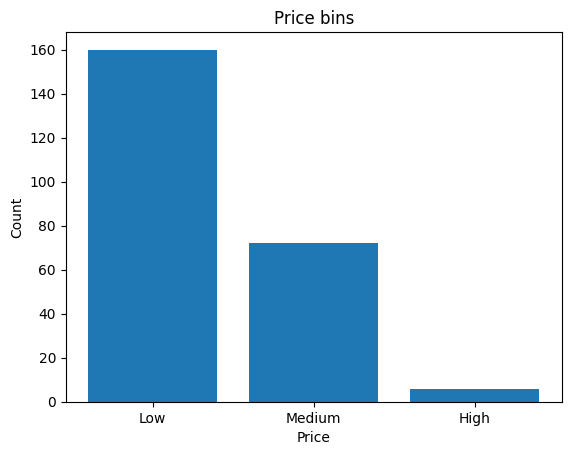

In [83]:
# Étape 8 : Créer des catégories pour la colonne Price
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)

# Visualiser les catégories de prix
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price bins")
plt.show()

In [84]:
# Étape 9 : Créer des variables indicatrices pour la colonne Screen
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel': 'Screen-IPS_panel', 'Full HD': 'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# Supprimer la colonne originale Screen
df.drop("Screen", axis=1, inplace=True)

# Afficher les premières lignes du DataFrame final
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,0.377415,1.6,8,256,0.283154,978,Low,False,True
1,1,Dell,3,1,1,3,0.679049,2.0,4,256,0.498208,634,Low,True,False
2,2,Dell,3,1,1,7,0.679049,2.7,8,256,0.498208,946,Low,True,False
3,3,Dell,4,2,1,5,0.245171,1.6,8,128,0.146953,1244,Low,False,True
4,4,HP,4,2,1,7,0.679049,1.8,8,256,0.394265,837,Low,True,False
